# LIS590DV Final Project: Task Three.

## Group: Whale.

**Xiaoliang Jiang, Yingjun Guan, Xinyu Zhang, Jialu Wang.**

You should write a function:
This function will receive a pandas dataframe object and a filename：
1.names
2.dates
3.latitude
4.longitude
5.categorical
6.quant1
7.quant2
8.quant3

save a PNG file to the supplied filename. The dates column will be in seconds since the epoch.

## Description
For first assumption, as the structure is given as above, we use several index number to find the columns. For the second one, as the latitudes and longitudes are worldwide, we use a rotatable globe rather than a map to show the distribution. For the last assumption, we concentrated on more about one quantitive values with several different attributes as longitude, latitude and category, but not the relationship between quantitive values. We also did not compare with the quantitive values directly in on plot, since if they are in different orders of magnitude, the comparation would not make sense. In addition, although some quantitive values may have correlations, but in general, the quantitives are more likely independent to each other. So what we finished is more concentrate on one single quantitive value, but not all of them.

**Strength:**

Beyond the required function, our function has several strengths.
1. Our function could provide as more dimensions of the data as we can, as the location (by latitude and longitude), different categories (in different color), top n categories, quartile of the quantitive data, rough value of each points, summary of each category and the dates of data. 
2. By using the values of longitude and latitude, we plot the data on a globe rather than a map to represent their distribution. The globe can be rotated in plotly online, or static in chunks.
3. Our function could print different quantitive value by different input of "quantnum". Users could type in the order number of quantitive value to see its information. If input is an invalid number, our function will return an error message. The default value of "quantnum" is 1 which means show the first quantitive value.
4. Different categories can be shown in our plots. With an input of "topn", users can show top n category as they want. Data out of top n will be shown in "others" category. The default value of "topn" is 5.
5. As the orders of magnitude of different quantitive values may be different, if we want to use different size to show the different values, we should put them in same order of magnitude. If we use log() on quantitive data, if the value are in same orders of magnitude, the differences between instances will hard to distinguish (like quant1 in sample data, all of the values are around 1); if we use an scale value on quantitive data like divide them by a given number, if they are in different orders of magnitude, some points will be too large to put in our plot, some points will be too small to distinguish. So, at last, we use quartile to divide them into four different group, and show their rough size on plot. Data in each quartile has a particular size. And the summary of the quartiles is shown in bottom left of our plot.
6. As we use plotly to draw this plot, not only the globe is interactive, but also the bar plots have some interactive features. Users could found detailed information about each category by their mouse pointer.
7. Our function could display different plots for different time period by using input of start time and end time. Users can only set an start time or end time to view data after or before that time. As the minimum time period is month, if the start time and end time are same, only on month data can be shown in our plot. The default value of start date and end date is BC -99999 and AD 99999 which could draw all of the data on plot.
8. Our function could name the plots automatically by column name and inputs (like time, top n category)
9. By using an "savetype" input, users could choose different way to save their plots, like saving it online, showing it in chunk or save it as .jpeg or .png file.
10. An error message will return if users input an invalid value.

**Weakness:**
1. Our function could not show the relationship between different quantitive values.
2. The size could not reflect the real value of points.
3. Our function cannot work on data-set with more than two categories or did not follows the given structure.
4. Our function works very well on globe; but for a city-size data set, limited by accuracy of the globe, it maybe works not very well.

**Wish to do:**
1. If it is possible, we would like to draw the distribution diagram on google map rather than on a globe, which could solve the problem that unknown latitude and longitude ranges.
2. More dimensions can be added in our plot by using more subplots area.

Reference:
https://plot.ly/python/mixed-subplots/

In [228]:
# By Xiaoliang Jiang
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
import pandas as pd
import math
from IPython.display import Image
import time

plotly.tools.set_credentials_file(username='xjiang36', api_key='uZyWsdSH3xd9bxUefIFf')

In [229]:
#By Xiaoliang Jiang
def Whaleteam(dataset='Q3-moreCtgSample.csv',topn=5,quantnum=1,savetype="inchunk",startyear=-99999,startmth=1,endyear=99999,endmth=12):
    for main in range(1):
        if savetype=="inchunk":
            break
        if savetype=="online":
            break
        if savetype=="png":
            break
        if savetype=="jpeg":
            break
        else:
            return "Error: invalid input of \"savetype\""
        
    
    colnum=quantnum+4
    dftemp = pd.read_csv(dataset,encoding='iso-8859-1')
    colnames=dftemp.columns.values
    
    for main in range(1):
        if startyear>endyear:
            return "Error: wrong input of \"startyear\" or \"endyear\",\"startyear\" cannot be earlier than \"endyear\"."
        if startmth>12:
            return "Error: wrong input of \"startmth\"."
        if startmth<1:
            return "Error: wrong input of \"startmth\"."
        if endmth>12:
            return "Error: wrong input of \"endmth\"."
        if endmth<1:
            return "Error: wrong input of \"endmth\"."
        if type(startyear)!=int:
            return "Error: wrong input of \"startyear\"."
        if type(endyear)!=int:
            return "Error: wrong input of \"endyear\"."
        if type(startmth)!=int:
            return "Error: wrong input of \"startmth\"."
        if type(endmth)!=int:
            return "Error: wrong input of \"endmth\"."
        if startyear==endyear:
            if startmth>endmth:
                return "Error: wrong input of \"startmth\" or \"endmth\"."
    
    if startyear<time.gmtime(min(dftemp[colnames[1]]))[0]:
        startyear=time.gmtime(min(dftemp[colnames[1]]))[0]
    if endyear>time.gmtime(max(dftemp[colnames[1]]))[0]:
        endyear=time.gmtime(max(dftemp[colnames[1]]))[0]
    
    sub=[]
    for i in range(len(dftemp[colnames[1]])):
        if time.gmtime(dftemp[colnames[1]][i])[0]>=startyear:
            if time.gmtime(dftemp[colnames[1]][i])[1]>=startmth:
                sub.append(i)
    dftemp1=dftemp.loc[sub]
    #print (len(dftemp1))
    sub2=[]
    for i in range(len(dftemp1.index)):
        if time.gmtime(dftemp[colnames[1]][i])[0]<=endyear:
            if time.gmtime(dftemp[colnames[1]][i])[1]<=endmth:
                sub2.append(i)    
    df1=dftemp1.loc[sub2]
    df2=df1.dropna(how='all')
    df3=df2.reset_index()
    df3colnames=df3.columns
    df=df3[df3colnames[1:]]
    #print (df)
    #print (len(df))
    
    for i in range(1):
        if quantnum<1:
            return "Error: wrong input of \"quantnum\", which should be an possitive integer."
        elif (quantnum+5)>len(colnames):
            return "Error: wrong input of  \"quantnum\". No that many quantitive variable."
        elif type(quantnum)!=int:
            return "Error: wrong input of \"quantnum\", which should be an possitive integer."
    
    freq=df[colnames[4]].value_counts().reset_index().rename(columns={'index': 'x'})
    
    freqcol=freq.columns.values
    
    for i in range(1):
        if len(freq)<topn:
            print ("freq=%s"%freq)
            print ("topn=%s"%topn)
            return "Error: wrong input of \"topn\",  No that many categories."
        elif topn<1:
            return "Error: wrong input of \"topn\", which should be an possitive integer."      
        elif type(topn)!=int:
            return "Error: wrong input of \"topn\", which should be an possitive integer."
        
    # Top 10 category in colorful, others in grey
    colorbar=["#FF6666","#FFB266","#FFFF66","#66FF66","#66FFFF","#66B2FF","#6666FF","#B266FF","#FF66FF","#FF66B2","#C0C0C0"]
    colorbars=[]
    for i in range(len(df[colnames[4]])):
    #for i in range(len(df.index)):
        for j in range(len(freq)):
            if df[colnames[4]][i]==freq["x"][j]:
                if j<(topn):
                    colorbars.append(colorbar[j])
                else:
                    colorbars.append(colorbar[10])

    sizes=[]
    for i in range(len(df[colnames[colnum]])):
        if df[colnames[colnum]][i]>df[colnames[colnum]].median():
            if df[colnames[colnum]][i]>(df[colnames[colnum]][df[colnames[colnum]]>df[colnames[colnum]].median()].median()):
                sizes.append(15)
            else:
                sizes.append(9)
        else:
            if df[colnames[colnum]][i]>(df[colnames[colnum]][df[colnames[colnum]]<df[colnames[colnum]].median()].median()):
                sizes.append(6)
            else:
                sizes.append(3)

    colorbars1=[]
    for i in range(topn):
        colorbars1.append(colorbar[i])
    colorbars1.append(colorbar[10])
#topn=5         
    topfreq=freq[:(topn+1)]
    topfreq.set_value(topn,freqcol[0],"Other")
    topfreq.set_value(topn,freqcol[1],sum(freq[freqcol[1]][topn:]))

    locations = Bar(x=topfreq[freqcol[0]],y=freq[freqcol[1]], marker=dict(color=colorbars1))

    trace3 = {
      "geo": "geo3", 
      "lon": df[colnames[3]],
      "lat": df[colnames[2]],
      "hoverinfo": 'text',
      "marker": {
        "size": sizes,
        "opacity": 0.8,
        "color": colorbars,
        "colorscale": 'Viridis'
      }, 
      "mode": "markers", 
      "type": "scattergeo"
    }

    data = Data([locations, trace3])

    # control the subplot below using domain in 'geo', 'scene', and 'axis'
    layout = {
      "plot_bgcolor": 'black',
      "paper_bgcolor": 'black',
      "titlefont": {
          "size": 20,
          "family": "Raleway"
      },
      "font": {
          "color": 'white'
      },
      "dragmode": "zoom", 
      "geo3": {
        "domain": {
          "x": [0, 0.55], 
          "y": [0.18, 0.9]
        }, 
        "lakecolor": "rgba(127,205,255,1)",
        "oceancolor": "rgb(6,66,115)",
        "landcolor": 'white',
        "projection": {"type": "orthographic"}, 
        "scope": "world", 
        "showlakes": True,
        "showocean": True,
        "showland": True,
        "bgcolor": 'black'
      }, 
      "margin": {
        "r": 10, 
        "t": 25, 
        "b": 40, 
        "l": 60
      }, 
      "scene": {"domain": {
          "x": [0.5, 1], 
          "y": [0, 0.55]
        },
               "xaxis": {"gridcolor": 'white'},
               "yaxis": {"gridcolor": 'white'},
               "zaxis": {"gridcolor": 'white'}
               }, 
      "showlegend": False, 
      "title": "<br>Overview of \"%s\" (top%s) from %s/%s to %s/%s" % (colnames[colnum],topn,startyear,startmth,endyear,endmth), 
      "xaxis": {
        "anchor": "y", 
        "domain": [0.6, 0.95]
      }, 
      "yaxis": {
        "anchor": "x", 
        "domain": [0.1, 0.9],
        "showgrid": False
      }
    }

    annotations = { "text": "Histrogram of \"%s\" (top%s)" % (colnames[colnum],topn),
                   "showarrow": False,
                   "xref": "paper",
                   "yref": "paper",
                   "x": 0.85,
                   "y": 0.95}

    annotations2 = { "text": "0%% to 25%%:%s to %s".ljust(30)%(round(df[colnames[colnum]].min(),4),round(df[colnames[colnum]][df[colnames[colnum]]<df[colnames[colnum]].median()].median(),4))+"<br>"+"25%% to 50%%:%s to %s".ljust(30)%(round(df[colnames[colnum]][df[colnames[colnum]]<df[colnames[colnum]].median()].median(),4),round(df[colnames[colnum]].median(),4))+"<br>"+"50%% to 75%%:%s to %s".ljust(30)%(round(df[colnames[colnum]].median(),4),round(df[colnames[colnum]][df[colnames[colnum]]>df[colnames[colnum]].median()].median(),4))+"<br>"+"75%% to 100%%:%s to %s".ljust(30)%(round(df[colnames[colnum]][df[colnames[colnum]]>df[colnames[colnum]].median()].median(),4),round(df[colnames[colnum]].max(),4)),
                   "showarrow": False,
                   "xref": "paper",
                   "yref": "paper",
                   "x": 0,
                   "y": 0}
    
    annotations3 = { "text":"Top3 position:<br>%s <br>%s <br>%s".ljust(15)%(dftemp[colnames[0]][dftemp.sort_values(colnames[colnum], ascending=False)[colnames[0]].index[0]],dftemp[colnames[0]][dftemp.sort_values(colnames[colnum], ascending=False)[colnames[0]].index[1]],dftemp[colnames[0]][dftemp.sort_values(colnames[colnum], ascending=False)[colnames[0]].index[2]]), 
                   "showarrow": False,
                   "xref": "paper",
                   "yref": "paper",
                   "x": 0.35,
                   "y": 0}

    layout['annotations'] = [annotations,annotations2,annotations3]

    fig = Figure(data=data, layout=layout)
    
    for i in range(1):
        if savetype=="inchunk":
            py.image.ishow(fig)
        elif savetype=="online":
            py.iplot(fig, filename = "Whale-plot-finalversion")
        elif savetype=="png":
            py.image.save_as(fig,'Whale-plot.png')
        elif savetype=="jpeg":
            py.image.save_as(fig,'Whale-plot.jpeg')
        else:
            return "print default save type: in chunk"
    #py.image.save_as(fig,"Histrogram of \"%s\" (top%s).png" % (colnames[colnum],topn))
    #Image("Histrogram of \"%s\" (top%s).png" % (colnames[colnum],topn))
    
    #Image('Whale-plot.png')
    #Image('Whale-plot.jpeg')

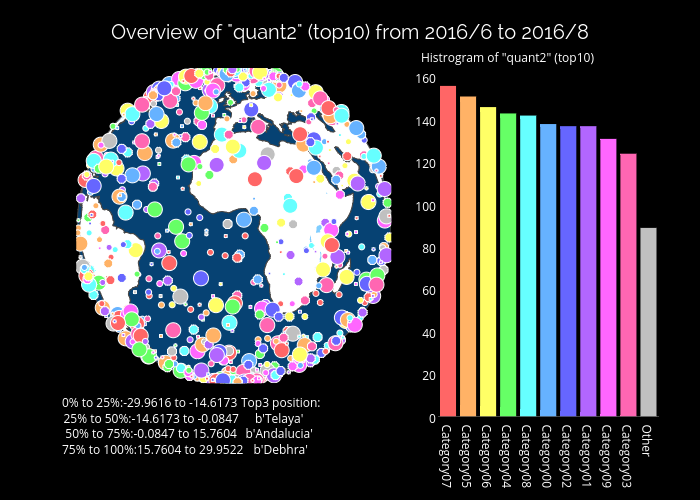

In [221]:
Whaleteam(dataset='Q3-moreCtgSample.csv',topn=10,quantnum=2,savetype="inchunk",startyear=2016,startmth=6,endyear=2016,endmth=8)

In [230]:
Whaleteam(dataset='Q3-moreCtgSample.csv',topn=10,quantnum=2,savetype="online",startyear=2016,startmth=6,endyear=2016,endmth=8)

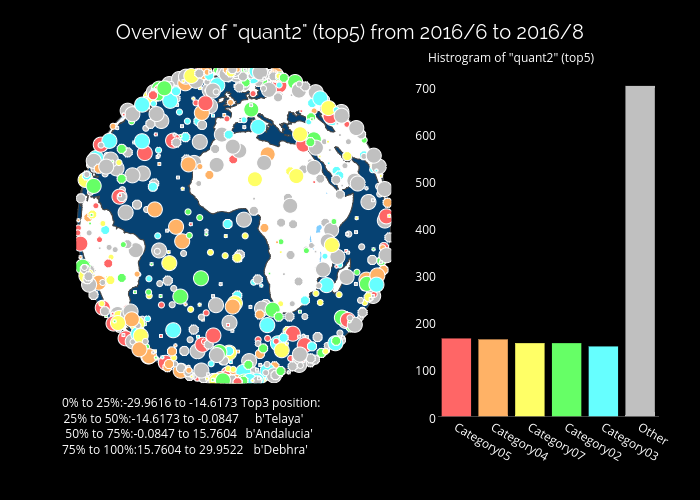

In [223]:
Whaleteam(dataset='t3sample.csv',topn=5,quantnum=2,savetype="inchunk",startyear=2016,startmth=6,endyear=2016,endmth=8)

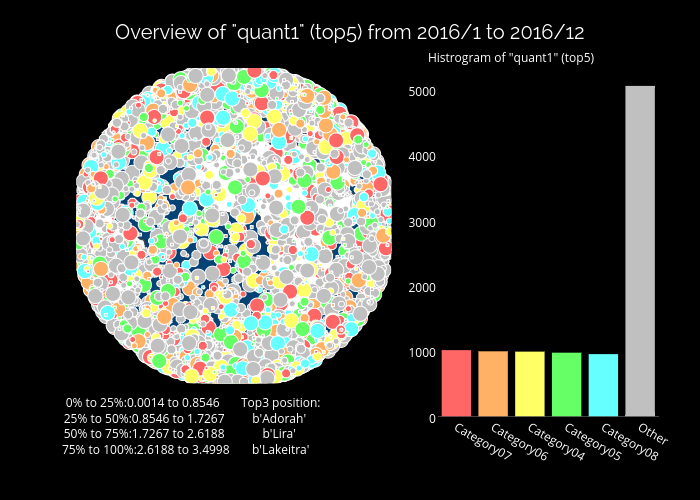

In [224]:
Whaleteam()